### Approach for the case study

We will adopt the following approach to our case study
1) Importing the necessary libraries and the data into dataset
2) Inspecting our data
3) Performing EDA
4) Data Preparation
5) Dummy Variable Creation
6) Test-Train split
7) Feature Scaling
8) Checking Co-relations (to be checked if at all necessary at the end of the use case, else to be removed)
9) Model Building 
10) Finalizing the model
11) Evaluation of the model

In [1354]:
#Importing the necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns

# Model Building
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 


# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1355]:
# Load the data into the dataset

leads_df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step-2 : Inspecting our dataset

In [1356]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1357]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1358]:
# Checking for the missing value columns (in percentage)
#round(leads_df.isnull().sum() / leads_df.shape[0],2)
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Step-3 : Performaning EDA 

We're required to do the following activities on this dataset here on

1) Handling the "select" value in the data column
2) Dropping any column with more than 70% missing values
3) Handling Missing values
4) Encoding of categorical value

In [1359]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select. Converting 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)

In [1360]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1361]:
# Let us get the list of all columns with missing value > 70%
null_percentage = leads_df.isnull().sum()/leads_df.shape[0]*100
null_percentage
cols_to_drop = null_percentage[null_percentage>70].keys()
cols_to_drop
leads_df = leads_df.drop(cols_to_drop, axis=1)

In [1362]:
# Check what all columns are available
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Now we will take care of null values in each column one by one.

#### Asymmetrique Activity Index | Asymmetrique Activity Score | Asymmetrique Profile Index | Asymmetrique Profile Score

In [1363]:
# These 4 columns have 45% and above values null. So as per the industry standards, we drop these columns
leads_df = leads_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

#### Lead Quality

In [1364]:
# Check what is in the column
leads_df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

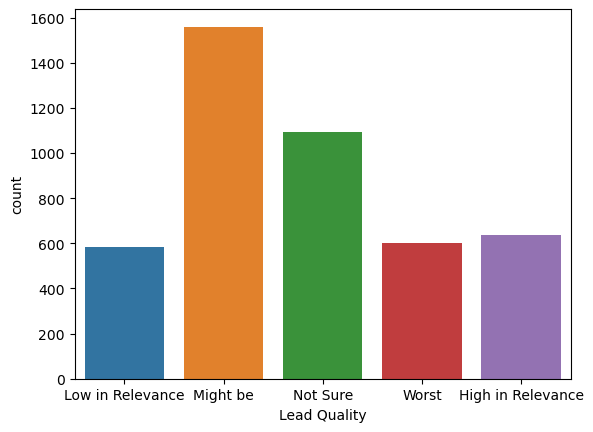

In [1365]:
# Plot the values to understand it better
sns.countplot(leads_df['Lead Quality'])
plt.show()

In [1366]:
# Each person can have their own interpretation of what a Lead Quality is,so it is highly subjective in nature. 
# Hence we shall safely assume the missing value as "Not Sure"
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan, 'Not Sure')

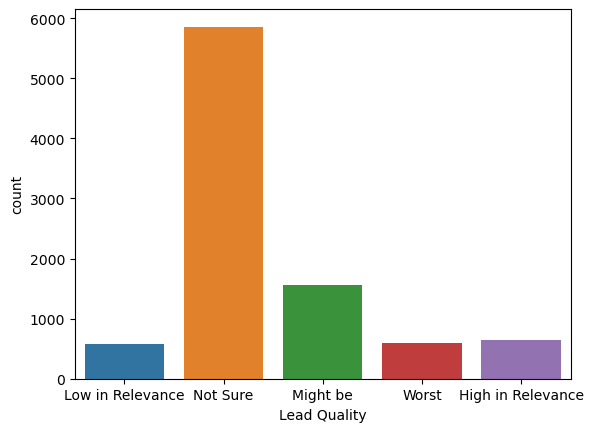

In [1367]:
# Let us plot the values again to see how we stand
sns.countplot(leads_df['Lead Quality'])
plt.show()

In [1368]:
# Let us check the details of the columns 
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Specialization

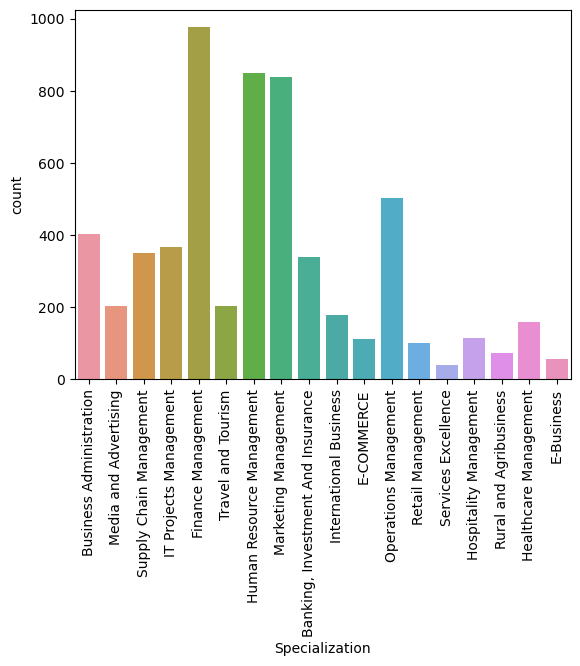

In [1369]:
# Let us plot the values again to see how we stand
sns.countplot(leads_df['Specialization'])
xticks(rotation = 90)
plt.show()

In [1370]:
# Since it is possible that the candidates did not select an option, could be because they did not find their choice being listed in the drop
# down. so it is good for us to create another category as "Others" and fill all these null values to others


leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

In [1371]:
# Let us check the details of the columns 
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### City

In [1372]:
leads_df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

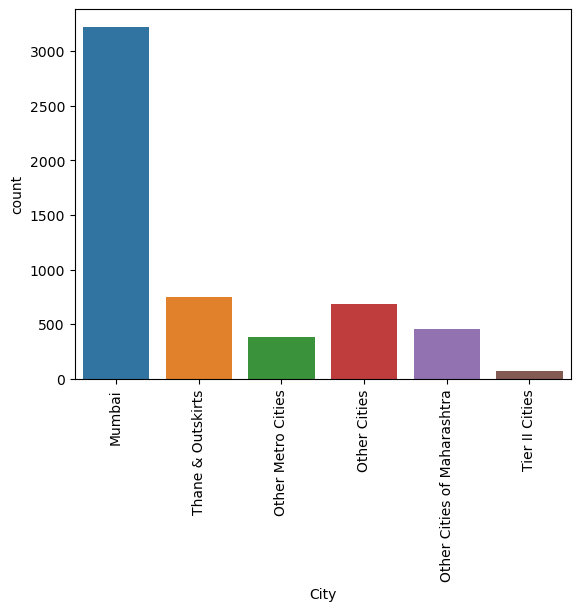

In [1373]:
# Let us visualize the data
sns.countplot(leads_df.City)
xticks(rotation = 90)
plt.show()

In [1374]:
# As we can see, Mumbai is almost 58% of the value in the dataset. So we can use Mumbai to impute the missing values
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

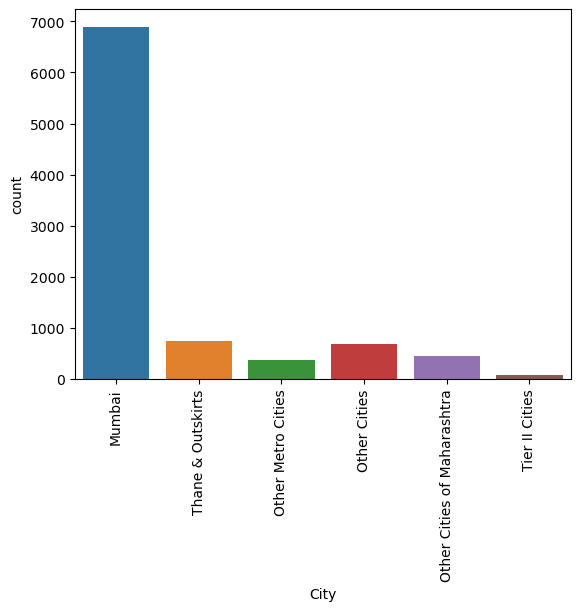

In [1375]:
# Let us visualize the data
sns.countplot(leads_df.City)
xticks(rotation = 90)
plt.show()

#### Tags

In [1376]:
leads_df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

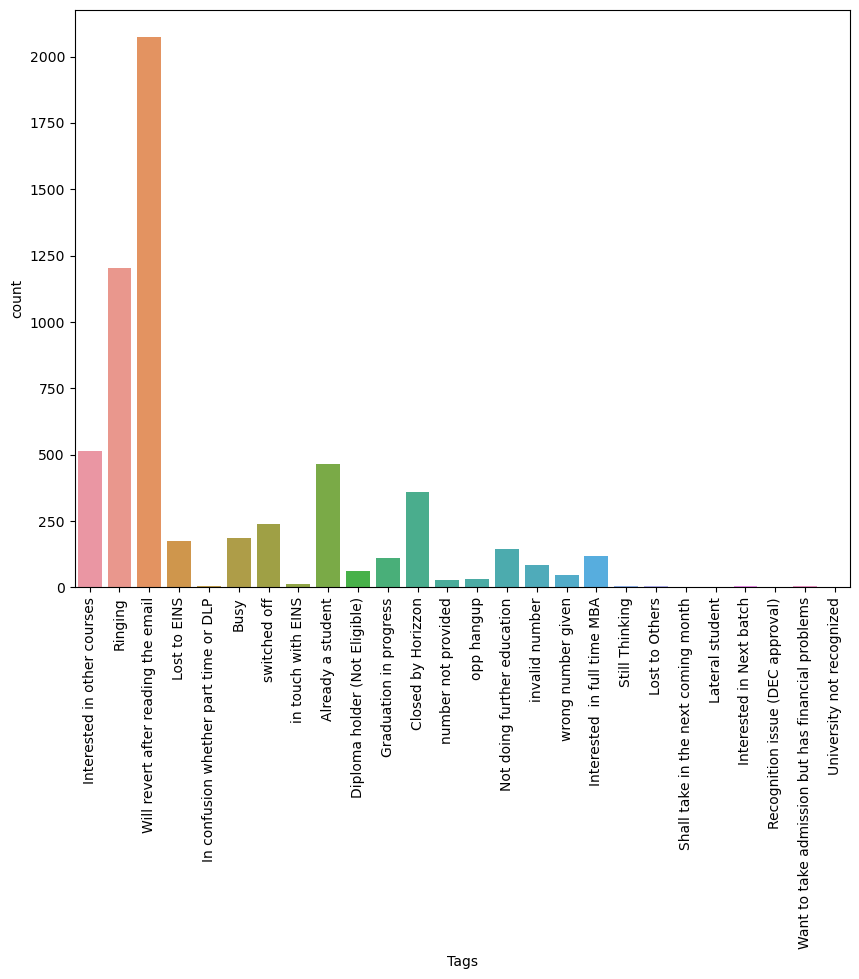

In [1377]:
fig, axs = plt.subplots(figsize = (10,7.5))
sns.countplot(leads_df.Tags)
xticks(rotation = 90)
plt.show()

In [1378]:
# For Tags column, more than 35% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
leads_df['Tags'] = leads_df['Tags'].replace(np.nan, 'Will revert after reading the email')

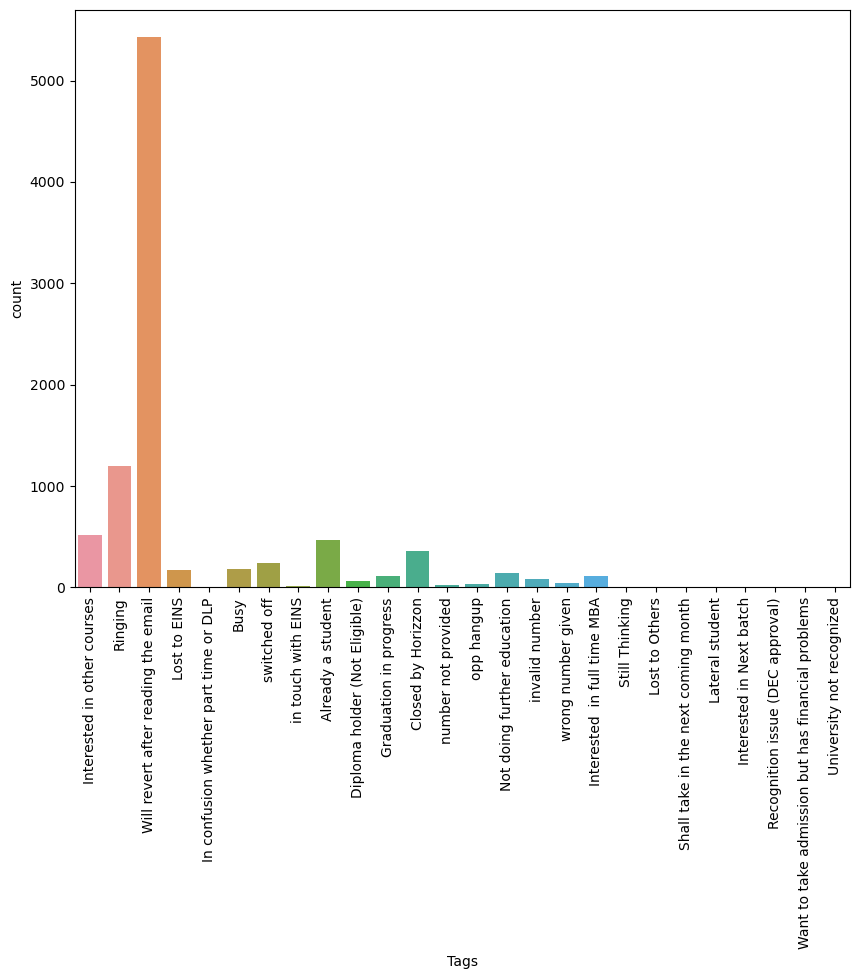

In [1379]:
fig, axs = plt.subplots(figsize = (10,7.5))
sns.countplot(leads_df.Tags)
xticks(rotation = 90)
plt.show()

#### What matters most to you in choosing a course

In [1380]:
leads_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [1381]:
# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

#### What is your current occupation

In [1382]:
# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

#### Country

In [1383]:
# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
leads_df['Country'] = leads_df['Country'].replace(np.nan, 'India')

In [1384]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [1385]:
# Rest missing values are under 2% so we can drop these rows.
leads_df.dropna(inplace = True)

In [1386]:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [1387]:
# We now have a very clean dataset. To be able to make use of this immediately in future, we can choose to save this for later usage

leads_df.to_csv('Leads_cleaned')

We can now start the EDA process with the clean dataset

### Univariate Analysis

#### Converted

In [1388]:
# Lets start with the target variable and see if we have any data imbalance or not 
leads_df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

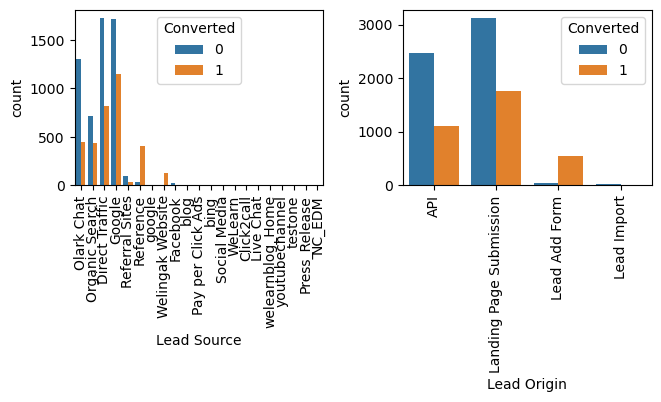

In [1389]:
# We have good representation of both the classes of data and hence we are good to go with the further analysis

fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(leads_df[feature], hue=leads_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

## Inference

a) Lead Import neither has good count nor is its conversion rate sufficient and hence are better off ignoring it.

b) API and the Landing Page Submission do bring in high number of lead counts but their conversion rate is very low.

c) The count of leads from the Lead Add Form is pretty low but the conversion rate is very high

#### Lead Source

In [1390]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

leads_df['Lead Source'] = leads_df['Lead Source'].replace("google", 'Google')

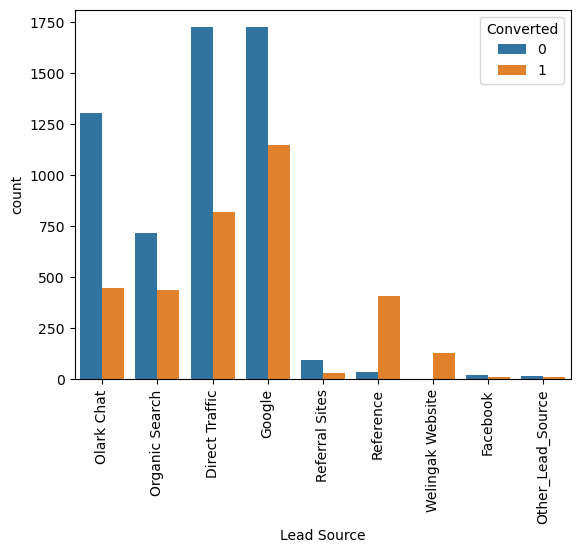

In [1391]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= leads_df)
plt.xticks(rotation='vertical')
plt.show()

### Inference

a) Google and Direct Traffic bring in the maximum leads.

b) Proportionally the conversion rate of the leads from Reference appears to be the best.

#### Do Not Email & Do Not Call

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

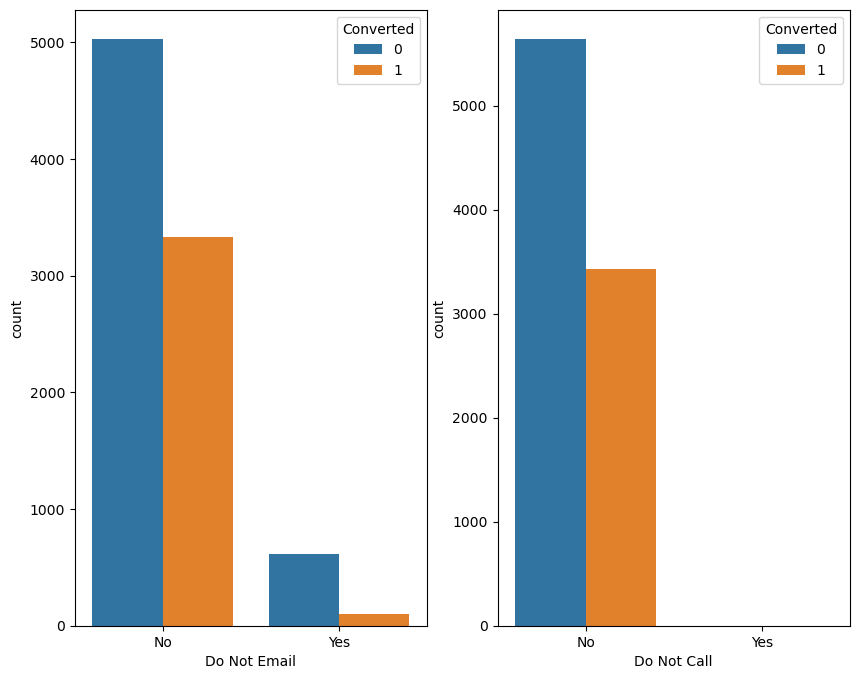

In [1392]:
fig, axs = plt.subplots(1,2,figsize = (10,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1])

#### Total Visits

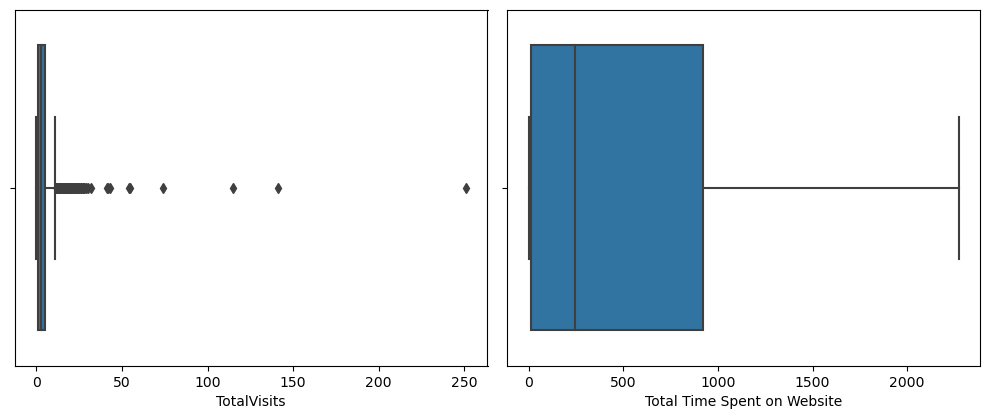

In [1393]:
fig=plt.subplots(figsize=(10, 8))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(leads_df[feature])
    plt.tight_layout()

In [1394]:
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [1395]:
# clearly we see a lot of outliers in the Total Visits columns. So we want to put a cap on the values. So first checking the percentile values of the 
# column to decide the values can cap this variable to 95 percetile 

percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

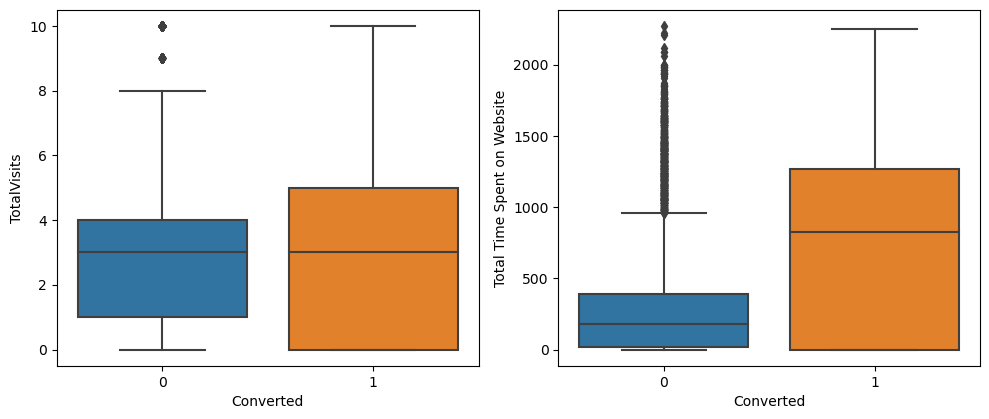

In [1396]:
fig=plt.subplots(figsize=(10, 8))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = leads_df)
    plt.tight_layout()

### Inference

Nothing conclusive can be said about the "converted" column, as the median for both conversion and non-conversion are the same.

Users spending more time on the website are more likely to get converted

#### Last Activity

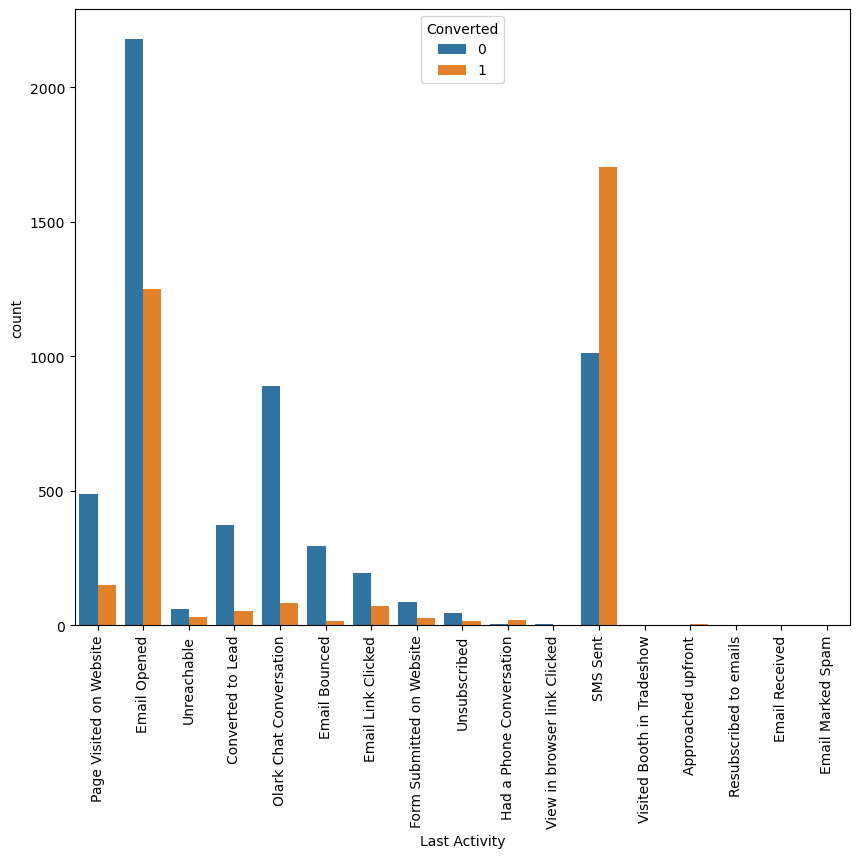

In [1397]:
# Plot the Last Activity again 
fig=plt.subplots(figsize=(10, 8))
sns.countplot(x="Last Activity", hue="Converted", data= leads_df)
plt.xticks(rotation='vertical')
plt.show()

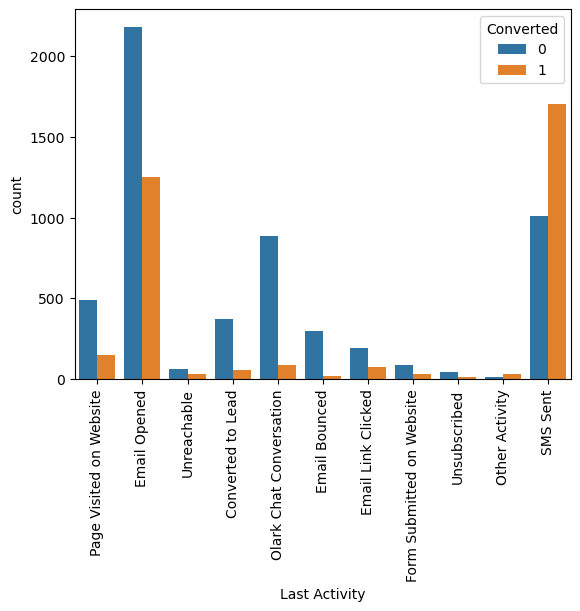

In [1398]:
# There are lots of activities with low count, So for better analysis we shall convert those categories to a single 'Others' category
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# Plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= leads_df)
plt.xticks( rotation='vertical')
plt.show()

### Inference

a) Email Opened has the maximum count.

b) The maximum conversion is when the last activity is SMS Sent

#### Page views per visit

In [1399]:
leads_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

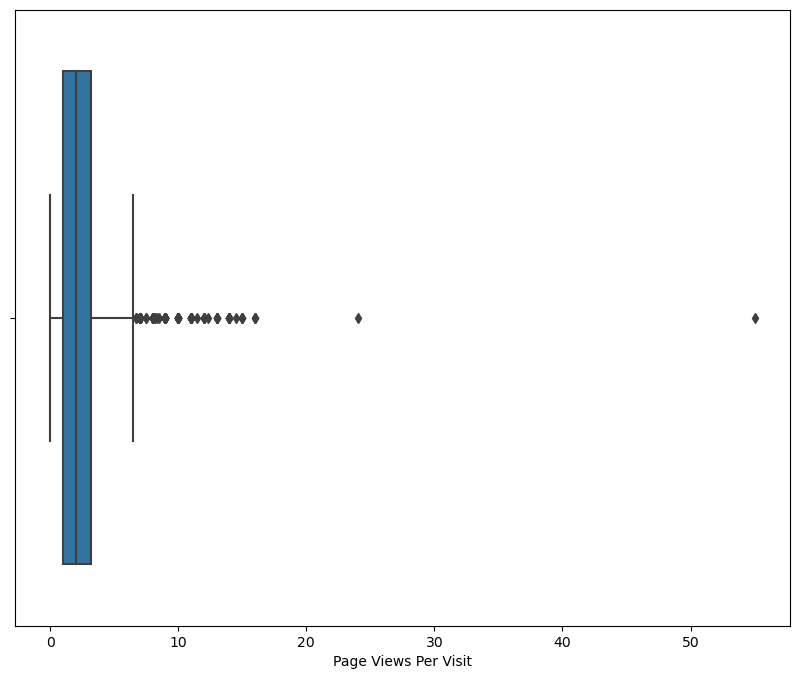

In [1400]:
# Ploting the values
fig=plt.subplots(figsize=(10, 8))
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

In [1401]:
# Outlier treatment for the column
percentiles = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

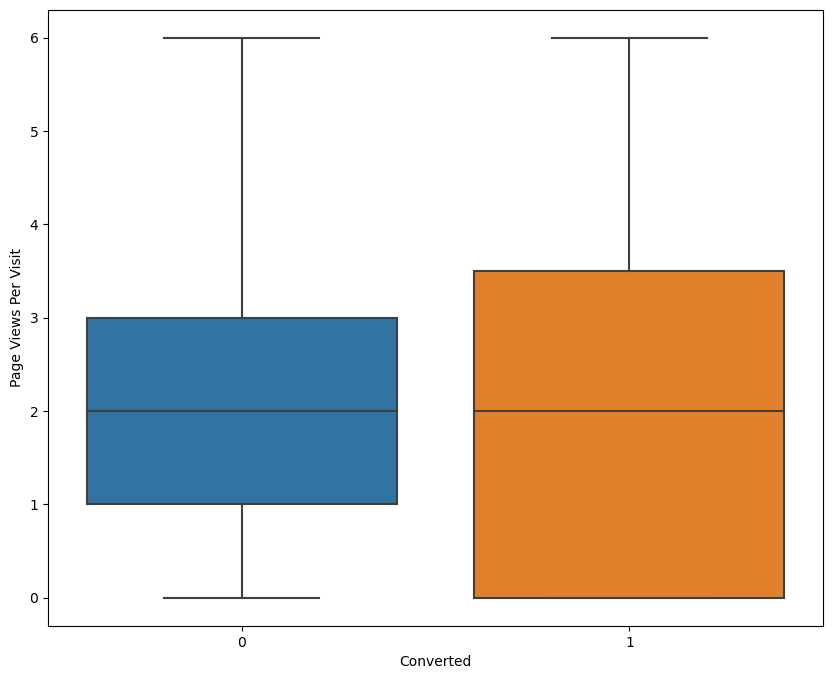

In [1402]:
fig=plt.subplots(figsize=(10, 8))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

### Inference
Nothing can be said specifically for lead conversion from Page Views Per Visit

#### Country

In [1403]:
leads_df.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

### Inference

Most values in the dataset belong to India. So nothing much to infer based on this column

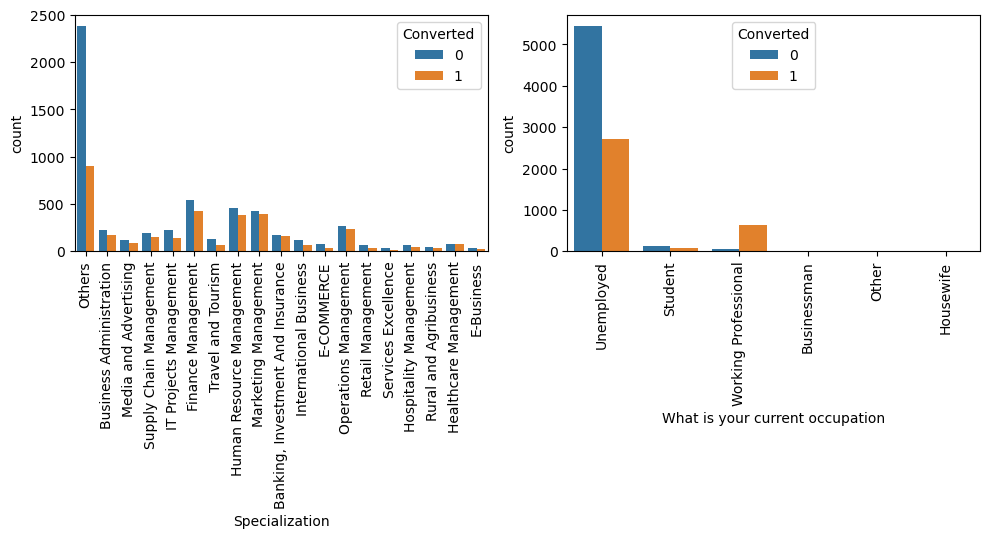

In [1404]:
fig=plt.subplots(figsize=(10, 8))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=leads_df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

### Inference

a) No particular inference can be made for Specialization

b) Working professionals have highest conversion rate

c) Number of Unemployed leads are the maximum compare to any other category

#### What matters most to you in choosing a course

In [1405]:
leads_df['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

### Inference

Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

#### Search

In [1406]:
leads_df.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Magazine

In [1407]:
leads_df.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

### Inference 
Most entries are 'No'. No Inference can be drawn with this parameter.

#### Newspaper Article

In [1408]:
leads_df['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

#### X Education Forums

In [1409]:
leads_df['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

#### Newspaper | Digital Advertisement | Through Recommendations | Receive More Updates About Our Courses | Update me on Supply Chain Content | Get updates on DM Content | I agree to pay the amount through cheque | A free copy of Mastering The Interview

In [1410]:
leads_df['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [1411]:
leads_df['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [1412]:
leads_df['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [1413]:
leads_df['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [1414]:
leads_df['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [1415]:
leads_df['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [1416]:
leads_df['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [1417]:
leads_df['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

### Inference

All these columns, have a maximum value of NO. So nothing can be concluded based on them.

## Conclusion for Univariate Analysis

Based on the univariate analysis it is noticed that many of the columns are not adding any value. So we'll go ahead and drop them from the dataset. These are not important for the model building.

In [1418]:
# dropping all the non important columns
leads_df = leads_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [1419]:
# find out how we stand now
leads_df.shape

(9074, 16)

### Step-4 : Preparing the data & Step-5 : Creating dummy variables for encoding

In this we'll be handling all the binary variables first. The Yes/No values will be converted to 1/0

In [1420]:
# Let us define a function to map the binary values

def map_binary_variables(variableName):
    return variableName.map({'Yes': 1, "No": 0})

In [1421]:
# We start with these two variables with binary values in it.
variable_list = ['Do Not Email', 'Do Not Call']

for colName in variable_list:
    leads_df[colName] = leads_df[colName].apply(lambda x : 1 if x=='Yes' else 0)

In [1422]:
# Check the dataset to see how the data is
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [1423]:
# Let us encode some of the categorical columns by creating dummy variables for it. We'll also be dropping the first one.
dummy_var_list = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy_var_list.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1424]:
# Add the dummy variables back to the main dataframe, we use the pandas concat function.
leads_df = pd.concat([leads_df, dummy_var_list], axis=1)
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administ

In [1425]:
# let us drop the original columns for whcih we've created the dummy variables
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [1426]:
# Finally before we start to do the train/test split we can get rid of the column prospect id

leads_df.drop(['Prospect ID'], axis=1, inplace=True)

In [1427]:
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## We have now completed the Data preparation and the necessary encoding of our data set, and we will now proceed to split our data into training and testing data, and then to the model builiding process.

### Step-6 : Train-Test Split

In [1428]:
# Split into X and y

X = leads_df.drop(['Converted'], axis=1)
y= leads_df['Converted']

In [1429]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1430]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(6351, 98) (2723, 98) (6351,) (2723,)


### Step-7 : Feature Scaling

In [1431]:
# We need to scale the following columns in the dataset
scaling_cols_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# We will be using the StandardScaler for our model hence reating an object of the StandardScaler class
std_scaler = StandardScaler()

# Scaling the columns
X_train[scaling_cols_list] = std_scaler.fit_transform(X_train[scaling_cols_list])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1432]:
# For just a high level view, we check what is the actual conversion rate for this data.

conversion_rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
conversion_rate

37.85541106458012

### We see that the conversion rate for this dataset is approx. 38%.

### Step-9 : Model Building

In [1433]:

lr_M1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lr_M1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           98
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.9
Date:                Mon, 23 Jan 2023   Deviance:                       2477.8
Time:                        14:48:47   Pearson chi2:                 3.61e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6105
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     22.9455   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                              -1.3930      0.337     -4.136      0.000      -2.053      -0.733
Do Not Call                                               23.6777   1.36e+05      0.000      1.000   -2.67e+05    2.67e+05
TotalVisits                                                0.1817      0.087      2.084      0.037       0.011       0.352
Total Time Spent on Website                                1.1453      0.064     17.841      0.000       1.020       1.271
Page Views Per Visit                                      -0.3249      0.099     -3.272      0.001      -0.520      -0.130
Lead Origin_Landing Page Submission                       -0.9741      0.223     -4.365      0.000      -1.412      -0.537
Lead Origin_Lead Add Form                                 -0.2941      1.335     -0.220      0.826      -2.910       2.322
Lead Origin_Lead Import                                   29.6602   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                     -28.5517   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                         0.2010      0.156      1.290      0.197      -0.104       0.506
Lead Source_Olark Chat                                     0.8885      0.235      3.782      0.000       0.428       1.349
Lead Source_Organic Search                                 0.1919      0.212      0.906      0.365      -0.223       0.607
Lead Source_Other_Lead_Source                              0.7657      0.815      0.939      0.348      -0.832       2.364
Lead Source_Reference                                      1.7598      1.394      1.263      0.207      -0.972       4.491
Lead Source_Referral Sites                                -0.1000      0.494     -0.202      0.840      -1.069       0.869
Lead Source_Welingak Website                               5.3825      1.528      3.522      0.000       2.387       8.378
Last Activity_Email Bounced                               -0.4004      0.876     -0.457      0.648      -2.117       1.317
Last Activity_Email Link Clicked                           0.8592      0.652      1.319      0.187      -0.418       2.136
Last Activity_Email Opened                                 0.0264      0.389      0.068      0.946      -0.736       0.789
Last Activity_Form Submitted on Website                    0.1490      0.597      0.249      0.803      -1.022       1.320
Last Activity_Olark Chat Conversation                     -0.5184      0.395     -1.312      0.190      -1.293       0.256
Last Act

Feature Selection Using RFE

In [1434]:
# Using Logistic Regression for the model
lrmodel = LogisticRegression()

# We start running the RFE with top 15 variables
rfe = RFE(estimator=lrmodel,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [1435]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 42),
 ('TotalVisits', False, 49),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 48),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', False, 51),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Other_Lead_Source', False, 53),
 ('Lead Source_Reference', False, 84),
 ('Lead Source_Referral Sites', False, 64),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 38),
 ('Last Activity_Email Link Clicked', False, 44),
 ('Last Activity_Email Opened', False, 77),
 ('Last Activity_Form Submitted on Website', False, 82),
 ('Last Activity_Olark Chat Conversation', False, 18),
 ('Last Activity_Other Activity', False, 11),
 ('Last Activity_Page Visited on Website', False, 45),
 ('Last Activit

In [1436]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Assessing the model with StatsModels

In [1437]:
X_train_sm = sm.add_constant(X_train[col])
lr_M2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr_M2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.2
Date:                Mon, 23 Jan 2023   Deviance:                       3176.4
Time:                        14:48:53   Pearson chi2:                 3.57e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5652
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5851      0.207     -7.673      0.000      -1.990      -1.180
Do Not Email                                -1.2714      0.214     -5.946      0.000      -1.690      -0.852
Lead Origin_Lead Add Form                    1.1288      0.363      3.110      0.002       0.417       1.840
Lead Source_Welingak Website                 3.3635      0.818      4.112      0.000       1.760       4.967
Tags_Busy                                    3.4323      0.332     10.345      0.000       2.782       4.083
Tags_Closed by Horizzon                      7.6671      0.761     10.076      0.000       6.176       9.158
Tags_Lost to EINS                            8.8786      0.752     11.807      0.000       7.405      10.352
Tags_Ringing                                -2.2142      0.338     -6.543      0.000      -2.877      -1.551
Tags_Will revert after reading the email     3.6531      0.225     16.267      0.000       3.213       4.093
Tags_invalid number                        -23.7322    2.2e+04     -0.001      0.999   -4.31e+04    4.31e+04
Tags_number not provided                   -24.2210   3.81e+04     -0.001      0.999   -7.48e+04    7.47e+04
Tags_switched off                           -2.8592      0.588     -4.860      0.000      -4.012      -1.706
Tags_wrong number given                    -23.3279   3.14e+04     -0.001      0.999   -6.16e+04    6.15e+04
Lead Quality_Not Sure                       -3.5346      0.126    -28.071      0.000      -3.781      -3.288
Lead Quality_Worst                          -3.9822      0.846     -4.709      0.000      -5.640      -2.325
Last Notable Activity_SMS Sent               2.8226      0.123     22.908      0.000       2.581       3.064
============================================================================================================
"""

#### As we can see the P Value of the feature (Tags_invalid number) is the highest with value = 0.999, which is well above the benchmark value of 0.005. So we'll drop the feature from the model.

In [1438]:
col1 = col.drop('Tags_invalid number',1)
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1439]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.2
Date:                Mon, 23 Jan 2023   Deviance:                       3190.4
Time:                        14:48:53   Pearson chi2:                 3.49e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5643
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7559      0.210     -8.362      0.000      -2.168      -1.344
Do Not Email                                -1.2639      0.213     -5.935      0.000      -1.681      -0.846
Lead Origin_Lead Add Form                    1.1665      0.366      3.190      0.001       0.450       1.883
Lead Source_Welingak Website                 3.3197      0.819      4.054      0.000       1.715       4.925
Tags_Busy                                    3.6277      0.331     10.961      0.000       2.979       4.276
Tags_Closed by Horizzon                      7.8284      0.762     10.277      0.000       6.335       9.321
Tags_Lost to EINS                            9.0461      0.753     12.015      0.000       7.571      10.522
Tags_Ringing                                -2.0021      0.337     -5.937      0.000      -2.663      -1.341
Tags_Will revert after reading the email     3.8272      0.227     16.872      0.000       3.383       4.272
Tags_number not provided                   -23.0078   2.32e+04     -0.001      0.999   -4.55e+04    4.54e+04
Tags_switched off                           -2.6412      0.587     -4.496      0.000      -3.793      -1.490
Tags_wrong number given                    -22.1199   1.91e+04     -0.001      0.999   -3.74e+04    3.74e+04
Lead Quality_Not Sure                       -3.5292      0.126    -28.063      0.000      -3.776      -3.283
Lead Quality_Worst                          -4.0020      0.846     -4.730      0.000      -5.660      -2.344
Last Notable Activity_SMS Sent               2.7726      0.121     22.915      0.000       2.535       3.010
============================================================================================================
"""

In [1440]:
# We drop the next higher P Value feature 
col2 = col1.drop('Tags_wrong number given',1)

In [1441]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1597.7
Date:                Mon, 23 Jan 2023   Deviance:                       3195.4
Time:                        14:48:53   Pearson chi2:                 3.49e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5639
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8314      0.210     -8.729      0.000      -2.243      -1.420
Do Not Email                                -1.2641      0.213     -5.945      0.000      -1.681      -0.847
Lead Origin_Lead Add Form                    1.1822      0.367      3.221      0.001       0.463       1.902
Lead Source_Welingak Website                 3.3032      0.819      4.031      0.000       1.697       4.909
Tags_Busy                                    3.7100      0.330     11.244      0.000       3.063       4.357
Tags_Closed by Horizzon                      7.9011      0.762     10.373      0.000       6.408       9.394
Tags_Lost to EINS                            9.1191      0.753     12.114      0.000       7.644      10.594
Tags_Ringing                                -1.9170      0.336     -5.704      0.000      -2.576      -1.258
Tags_Will revert after reading the email     3.9045      0.226     17.247      0.000       3.461       4.348
Tags_number not provided                   -21.9227   1.41e+04     -0.002      0.999   -2.76e+04    2.76e+04
Tags_switched off                           -2.5545      0.587     -4.354      0.000      -3.704      -1.405
Lead Quality_Not Sure                       -3.5290      0.126    -28.070      0.000      -3.775      -3.283
Lead Quality_Worst                          -3.9790      0.849     -4.686      0.000      -5.643      -2.315
Last Notable Activity_SMS Sent               2.7608      0.120     22.925      0.000       2.525       2.997
============================================================================================================
"""

In [1442]:
# We drop the next higher P Value feature 
col3 = col2.drop('Tags_number not provided',1)

In [1443]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Mon, 23 Jan 2023   Deviance:                       3202.0
Time:                        14:48:53   Pearson chi2:                 3.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5635
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9192      0.211     -9.080      0.000      -2.333      -1.505
Do Not Email                                -1.2835      0.212     -6.062      0.000      -1.698      -0.868
Lead Origin_Lead Add Form                    1.2035      0.368      3.267      0.001       0.482       1.925
Lead Source_Welingak Website                 3.2825      0.820      4.002      0.000       1.675       4.890
Tags_Busy                                    3.8043      0.330     11.525      0.000       3.157       4.451
Tags_Closed by Horizzon                      7.9789      0.762     10.467      0.000       6.485       9.473
Tags_Lost to EINS                            9.1948      0.753     12.209      0.000       7.719      10.671
Tags_Ringing                                -1.8121      0.336     -5.401      0.000      -2.470      -1.154
Tags_Will revert after reading the email     3.9906      0.228     17.508      0.000       3.544       4.437
Tags_switched off                           -2.4456      0.586     -4.171      0.000      -3.595      -1.297
Lead Quality_Not Sure                       -3.5218      0.126    -28.036      0.000      -3.768      -3.276
Lead Quality_Worst                          -3.9106      0.856     -4.567      0.000      -5.589      -2.232
Last Notable Activity_SMS Sent               2.7395      0.120     22.907      0.000       2.505       2.974
============================================================================================================
"""

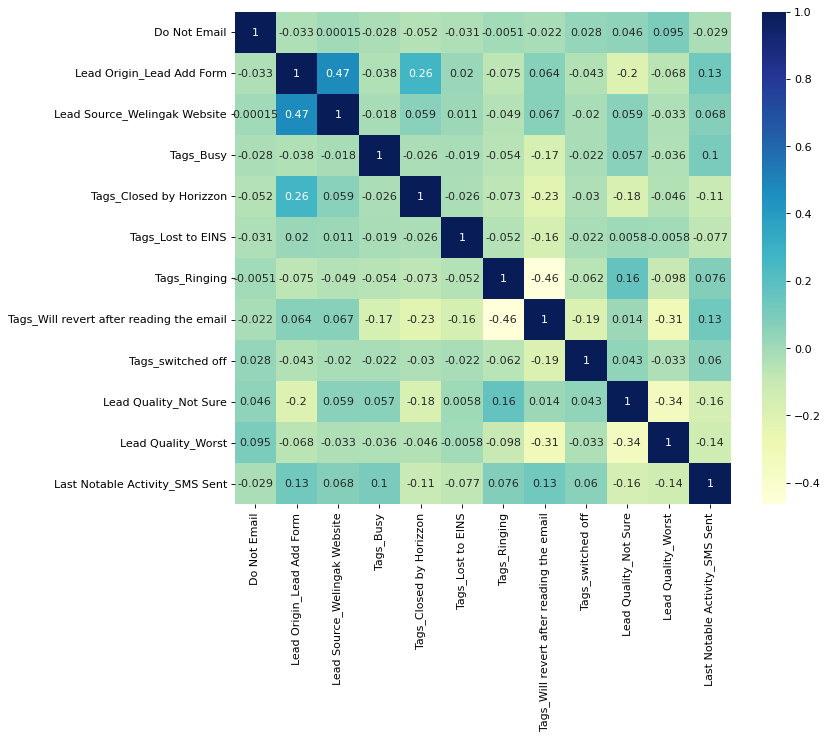

In [1484]:
# Checking the correlation between the features (for Training data)
plt.figure(figsize=(10,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col3].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

#### We shall now get the predicted value for our test data 

In [1444]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.189946
1012    0.061006
9226    0.000707
4750    0.784007
7987    0.977108
1281    0.991926
2880    0.189946
4971    0.750786
7536    0.888099
1248    0.000707
dtype: float64

In [1445]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.89945603e-01, 6.10055097e-02, 7.07499981e-04, 7.84007054e-01,
       9.77108077e-01, 9.91926005e-01, 1.89945603e-01, 7.50785828e-01,
       8.88098557e-01, 7.07499981e-04])

#### Creating a final dataset

In [1446]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.189946,3009
1,0,0.061006,1012
2,0,0.000707,9226
3,1,0.784007,4750
4,1,0.977108,7987


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [1447]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.189946,3009,0
1,0,0.061006,1012,0
2,0,0.000707,9226,0
3,1,0.784007,4750,1
4,1,0.977108,7987,1


### Confusion Matrix

In [1448]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3751  154]
 [ 357 2089]]


In [1449]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9195402298850575


Checking the VIF

In [1450]:

vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,2.66
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.55
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.12
3,Tags_Busy,1.11
10,Lead Quality_Worst,1.10
5,Tags_Lost to EINS,1.04
8,Tags_switched off,1.04


### Observation

All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

Accuracy Metrics

In [1451]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1452]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of Model =",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity of Model =", TN / float(TN+FP))

Sensitivity of Model = 0.8540474243663123
Specificity of Model = 0.9605633802816902


In [1453]:
# Calculate false postive rate 
print("False Positive = ",FP/ float(TN+FP))

# positive predictive value 
print ("True Positive = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative = ",TN / float(TN+ FN))

False Positive =  0.03943661971830986
True Positive =  0.9313419527418636
True Negative =  0.9130963972736125


In [1454]:
# Accuracy of the model
model_accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Accuracy score",model_accuracy )

Accuracy score 0.9195402298850575


### Plotting the ROC Curve

An ROC curve demonstrates several things:

a) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

b) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

c) The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


### our goal is to achieve good sensitivity score

In [1455]:
# A function to define the ROC calculation

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1456]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

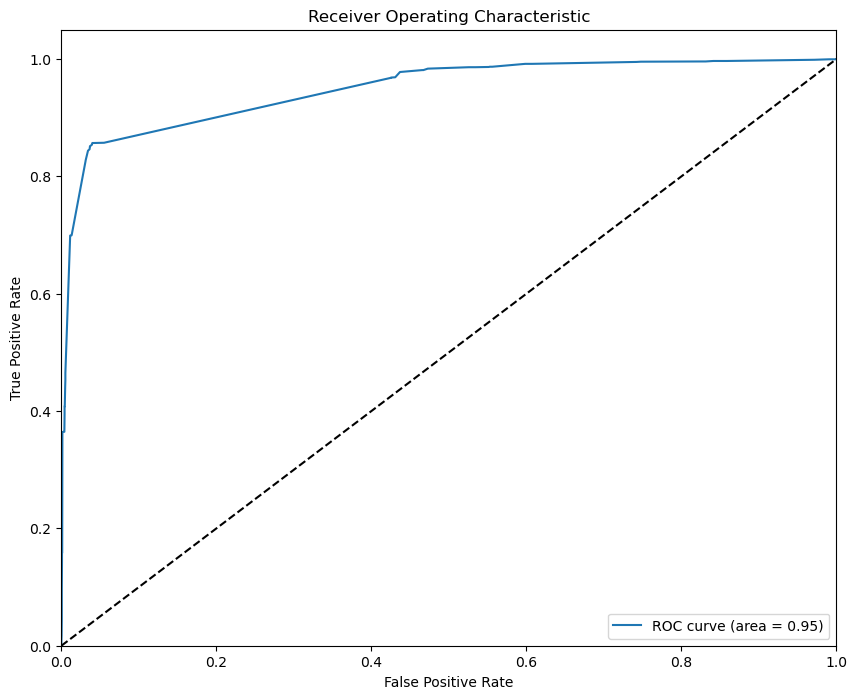

In [1457]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [1458]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1


In [1459]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.706503     0.981194     0.534443
0.2   0.2  0.911195     0.857318     0.944942
0.3   0.3  0.919383     0.856909     0.958515
0.4   0.4  0.920170     0.856092     0.960307
0.5   0.5  0.919540     0.854047     0.960563
0.6   0.6  0.920170     0.851594     0.963124
0.7   0.7  0.918753     0.843827     0.965685
0.8   0.8  0.876397     0.700327     0.986684
0.9   0.9  0.790742     0.464841     0.994878


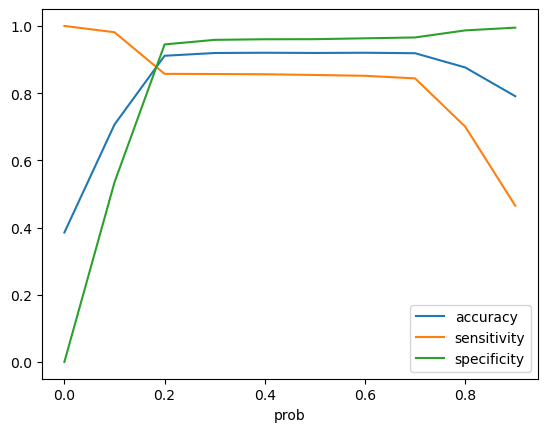

In [1460]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [1461]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [1462]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [1463]:
# Let's check the overall accuracy.
accuracy_score = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print("Accuracy Score = ",accuracy_score)

# Form the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("Confusion Matrix = ",confusion2)

Accuracy Score =  0.911195087387813
Confusion Matrix =  [[3690  215]
 [ 349 2097]]


In [1464]:
# Calculating manually first
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
model_sensitivity = TP / float(TP+FN)
print("Sensitivity of Model =",model_sensitivity)

# Let us calculate specificity
model_specificity = TN / float(TN+FP)
print("Specificity of Model =", model_specificity )

# Calculate false postive rate 
print("False Positive = ",FP/ float(TN+FP))

# positive predictive value 
print ("True Positive = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative = ",TN / float(TN+ FN))

Sensitivity of Model = 0.857318070318888
Specificity of Model = 0.9449423815620999
False Positive =  0.05505761843790013
True Positive =  0.9070069204152249
True Negative =  0.9135924733845011


### Precision and Recall

In [1465]:
# This is our confusion matrix
#confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
#print("confusion_matrix =",confusion_matrix)

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("confusion_matrix =",confusion_matrix)

confusion_matrix = [[3690  215]
 [ 349 2097]]


In [1466]:
# Precision and Recall Scores
precision_score = precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
recall_score = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

print("Precision score (using sklearn) =",precision_score)
print("Recall Score (using sklearn) =",recall_score )


Precision score (using sklearn) = 0.9313419527418636
Recall Score (using sklearn) = 0.8540474243663123


### Precision-Recall Tradeoff

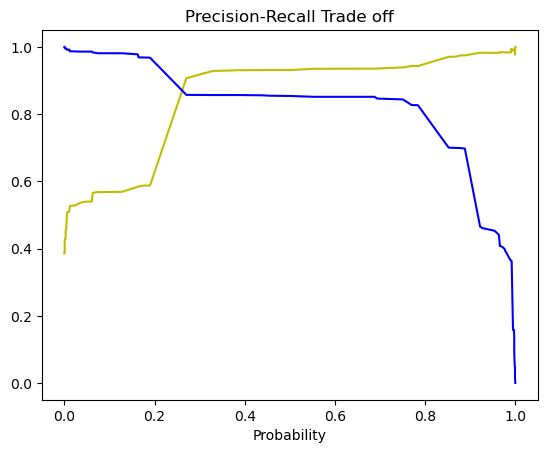

In [1467]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, precision[:-1], "y-")
plt.plot(thresholds, recall[:-1], "b-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

### Final Model

In [1468]:
print("------------------Model Evaluation Metrics-------------------")    
print("Confusion Matrix :\n", confusion)
print("Accuracy :", model_accuracy*100)
print("Sensitivity :", model_sensitivity*100)
print("Specificity :", model_specificity*100)
print("Precision :", precision_score*100)   

------------------Model Evaluation Metrics-------------------
Confusion Matrix :
 [[3751  154]
 [ 357 2089]]
Accuracy : 91.95402298850574
Sensitivity : 85.73180703188879
Specificity : 94.49423815620999
Precision : 93.13419527418635


In [1137]:
# Features used in our model
print("------------------ Features in the model -------------------")   
print(col3)

------------------ Features in the model -------------------
Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [1469]:
# Important features in the model
print("------------------ Importance of the involved Features in the model -------------------") 
res.params

------------------ Importance of the involved Features in the model -------------------


const                                      -1.919177
Do Not Email                               -1.283482
Lead Origin_Lead Add Form                   1.203526
Lead Source_Welingak Website                3.282453
Tags_Busy                                   3.804276
Tags_Closed by Horizzon                     7.978850
Tags_Lost to EINS                           9.194818
Tags_Ringing                               -1.812061
Tags_Will revert after reading the email    3.990641
Tags_switched off                          -2.445628
Lead Quality_Not Sure                      -3.521828
Lead Quality_Worst                         -3.910568
Last Notable Activity_SMS Sent              2.739536
dtype: float64

In [1471]:
#feature_importance = abs(new_params)
feature_importance = res.params[1:]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                -13.958752
Lead Origin_Lead Add Form                    13.089176
Lead Source_Welingak Website                 35.698951
Tags_Busy                                    41.374136
Tags_Closed by Horizzon                      86.775512
Tags_Lost to EINS                           100.000000
Tags_Ringing                                -19.707413
Tags_Will revert after reading the email     43.400979
Tags_switched off                           -26.597895
Lead Quality_Not Sure                       -38.302313
Lead Quality_Worst                          -42.530135
Last Notable Activity_SMS Sent               29.794348
dtype: float64

In [1472]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')

In [1478]:
sorted_idx

Do Not Email                                10
Lead Origin_Lead Add Form                    9
Lead Source_Welingak Website                 8
Tags_Busy                                    6
Tags_Closed by Horizzon                      0
Tags_Lost to EINS                            1
Tags_Ringing                                11
Tags_Will revert after reading the email     2
Tags_switched off                            3
Lead Quality_Not Sure                        7
Lead Quality_Worst                           4
Last Notable Activity_SMS Sent               5
dtype: int64

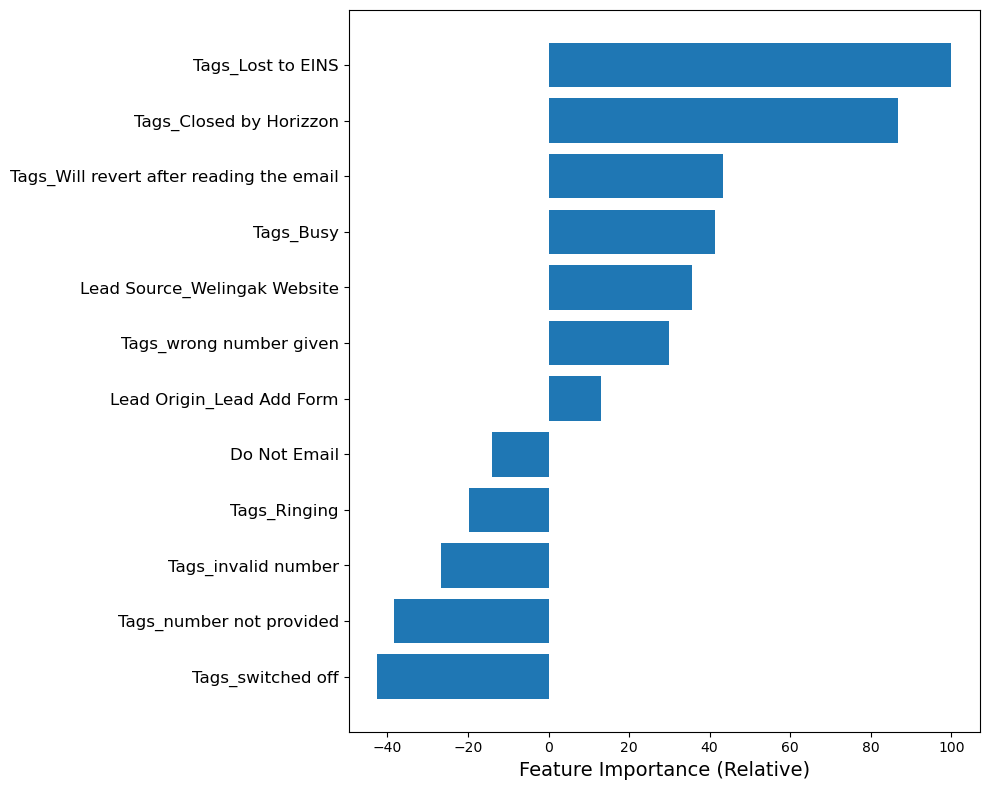

In [1476]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Feature Importance (Relative)', fontsize=14)

plt.tight_layout()   
plt.show()

In [1482]:
# The top three features based on their importance.
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
5,Tags_Lost to EINS,100.000000
4,Tags_Closed by Horizzon,86.775512
7,Tags_Will revert after reading the email,43.400979


In [1481]:
# The bottom three features based on their importance.
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=True).head(3)

,index,0
10,Lead Quality_Worst,-42.530135
9,Lead Quality_Not Sure,-38.302313
8,Tags_switched off,-26.597895


## Conclusion

Our model is based on Logistic Regression.

The P Value of all features are within the standard range of 0.05

All features have a low VIF, thus proving that there is no multi-collineratity amongst them. 

The model predicts the probability of the target variable with a specific value. It does not predict the exact value directly. We use the cutoff probability for the predicted value for the target variable.

The aim of our model is to predict the conversion probability of leads received.

We chose an optimal cutoff of (0.24 to 0.27), as the intersection is in that range. This means any lead with probability greater than 0.27, will be considered a probable conversion (hot lead). 

Our final model is built using 12 features and they are 

    1) 'Do Not Email'

    2) 'Lead Origin_Lead Add Form'
    
    3) 'Lead Source_Welingak Website'
    
    4) 'Tags_Busy'
    
    5) 'Tags_Closed by Horizzon'
    
    6) 'Tags_Lost to EINS'
    
    7) 'Tags_Ringing'
    
    8) 'Tags_Will revert after reading the email'
    
    9) 'Tags_switched off'
    
    10) 'Lead Quality_Not Sure'
    
    11) 'Lead Quality_Worst'
    
    12) 'Last Notable Activity_SMS Sent'

Our top variables in the final model are

Positive

    Tags_Lost to EINS (co-efficent = 9.194818, Importance = 100%)
    
    Tags_Closed by Horizzon (co-efficent = 7.978850, Importance = 86.77%)

    Tags_Will revert after reading the email (co-efficent = 3.990641, Importance = 43.40% )

Negative

    Tags_switched off (co-efficent = -2.44, Importance = 26.59%)

    Lead Quality_Not Sure (co-efficent = -3.52, Importance = -38.30%)

    Lead Quality_Worst (co-efficent = -3.91, Importance = 42.53%)

    
    

Our model has the following metrics

    a) Accuracy = 91.95%, which means our model can predict the correct leads at 91.95% success rate.
    
    b) sensitivity = 85.73%, which means our positive conversion prediction is ~86%
    
    c) precision = 93.13%, which means that out of the predicted leads, 93% are Hot Leads.